<a href="https://colab.research.google.com/github/kristi-thinkful/thinkful-solutions/blob/master/python_IV_intermediate_statistics/python_self_sufficiency_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Take the Python self-sufficiency exam
In this checkpoint, you'll complete the Python self-sufficiency exam. The point of this exam is for you to demonstrate your mastery of the basics of programming and data analysis in Python.

To complete this exam, you should submit a single notebook. It should contain either multiple cells, or multiple distinct sections divided by markdown text headers. For each of the following, produce one cell/section:



In [0]:
# this code allows the display of output from multiple calls without requiring print() each time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set()

####1. Create a function that reverses a string. For example, given the string "forward", your function should return "drawrof". Assume all inputs are strings.



In [15]:
def reverse(string):
  index = len(string) - 1
  reversed = ""
  for i in range(index, -1, -1):
    reversed += string[i]
  return reversed

reverse('peach')

'hcaep'

####2. Complete the function below that can be used to calculate and return the posterior probability of an event A, given the known outcome of Event B using Bayes Theorem:
    def bayes(a, b_given_a, b_given_not_a):

      """
      Calculates P(A | B) using bayes theorem.

      Args:
          a: P(A)
          b_given_a: P(B | A)
          b_given_not_a: P(B | ~A)

      Returns:
          P(A | B)
    """


In [0]:
def bayes(a, b_given_a, b_given_not_a):
  a_given_b = a * b_given_a / (b_given_a + b_given_not_a)
  return(a_given_b)

####3. Analyze the teams dataset from the Lahman baseball records. This dataset contains season statistics for each Major League Baseball team.

a. For all records since 1995, plot histograms for the following variables. Which distribution do they appear to follow, given their meaning?

 - Stolen bases per game
 - Wins
 - Earned run average

In [13]:
baseball_url = 'https://raw.githubusercontent.com/kristi-thinkful/thinkful-solutions/master/python_self_sufficiency_exam/lahman-teams.csv'
baseball = pd.read_csv(baseball_url)
baseball.sort_values(['yearID', 'teamID'], inplace=True)
baseball.head(15)
baseball['SB'].describe()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60,19.0,73.0,NaN,NaN,NaN,303,109,3.55,22,1,3,828,367,2,42,23,225,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60,22.0,69.0,NaN,NaN,NaN,241,77,2.76,25,0,1,753,308,6,28,22,218,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,NaN,N,NaN,249,1186,328,35,40,7,26,25.0,18.0,NaN,NaN,NaN,341,116,4.11,23,0,0,762,346,13,53,34,223,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,NaN,N,NaN,137,746,178,19,8,2,33,9.0,16.0,NaN,NaN,NaN,243,97,5.17,19,1,0,507,261,5,21,17,163,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,1404,403,43,21,1,33,15.0,46.0,NaN,NaN,NaN,313,121,3.72,32,1,0,879,373,7,42,22,227,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
5,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,NaN,NaN,Y,NaN,376,1281,410,66,27,9,46,23.0,56.0,NaN,NaN,NaN,266,137,4.95,27,0,0,747,329,3,53,16,194,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
6,1871,NaN,RC1,ROK,NaN,9,25,NaN,4,21,NaN,NaN,N,NaN,231,1036,274,44,25,3,38,30.0,53.0,NaN,NaN,NaN,287,108,4.30,23,1,0,678,315,3,34,16,220,NaN,0.82,Rockford Forest Citys,Agricultural Society Fair Grounds,NaN,97,99,ROK,RC1,RC1
7,1871,NaN,TRO,TRO,NaN,6,29,NaN,13,15,NaN,NaN,N,NaN,351,1248,384,51,34,6,49,19.0,62.0,NaN,NaN,NaN,362,153,5.51,28,0,0,750,431,4,75,12,198,NaN,0.84,Troy Haymakers,Haymakers' Grounds,NaN,101,100,TRO,TRO,TRO
8,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,NaN,NaN,N,NaN,310,1353,375,54,26,6,48,13.0,48.0,NaN,NaN,NaN,303,137,4.37,32,0,0,846,371,4,45,13,217,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
9,1872,NaN,BL1,BLC,NaN,2,58,NaN,35,19,NaN,NaN,N,NaN,617,2576,747,94,35,14,27,28.0,35.0,15.0,NaN,NaN,434,173,3.02,48,1,1,1545,566,3,63,0,432,NaN,0.82,Baltimore Canaries,Newington Park,NaN,106,102,BAL,BL1,BL1


count    2661.000000
mean      112.271702
std        70.811076
min         0.000000
25%        64.000000
50%        96.000000
75%       141.000000
max       581.000000
Name: SB, dtype: float64

In [0]:
# stolen bases
clean_SB = baseball[pd.notnull(baseball['SB'])]

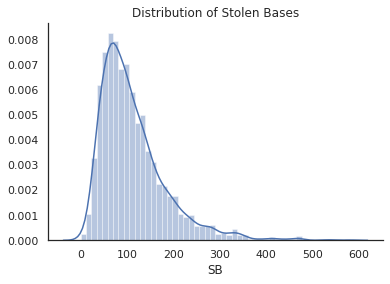

In [37]:
sns.set_style('white')
sns.distplot(clean_SB['SB'])
plt.title("Distribution of Stolen Bases")
sns.despine();

count    2805.000000
mean       74.749020
std        17.640402
min         0.000000
25%        66.000000
50%        77.000000
75%        87.000000
max       116.000000
Name: W, dtype: float64


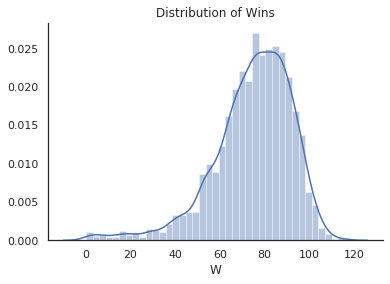

In [11]:
print(baseball['W'].describe())
sns.set_style('white')
sns.distplot(baseball['W'])
plt.title("Distribution of Wins")
sns.despine();

count    2805.000000
mean      681.945811
std       134.914999
min        34.000000
25%       609.000000
50%       688.000000
75%       764.000000
max      1252.000000
Name: RA, dtype: float64


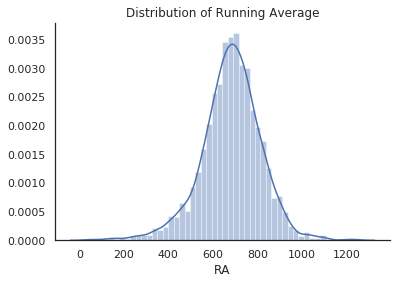

In [10]:
print(baseball['RA'].describe())
sns.set_style('white')
sns.distplot(baseball['RA'])
plt.title("Distribution of Running Average")
sns.despine();

b. Conduct some further exploratory data analysis on this dataset. Consider qualities like distributions, correlations and trends over time. Try to find something interesting to say about the data, and use visualizations to support your argument.

####4. Choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations each time. Plot the frequencies of the sample means. What distribution does this appear to follow?
* Hint: df['col'].sample(n=50) will draw 50 random observations from df['col'].

count    2805.000000
mean     5142.492335
std       750.551691
min       211.000000
25%      5127.000000
50%      5389.000000
75%      5517.000000
max      5781.000000
Name: AB, dtype: float64


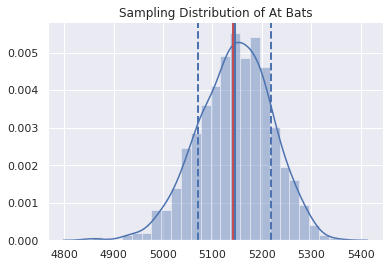

In [39]:
print(baseball['AB'].describe())
sample_means = []

for i in range(1000):
  mean = baseball['AB'].sample(n = 100).mean()
  sample_means.append(mean)

sample_means = pd.Series(sample_means)

sns.distplot(sample_means)
plt.title('Sampling Distribution of At Bats')
plt.axvline(sample_means.mean(), linewidth = 2)
plt.axvline(baseball['AB'].mean(), color = 'r', linewidth = 2)
plt.axvline(sample_means.mean() + sample_means.std(), linestyle = 'dashed', linewidth = 2)
plt.axvline(sample_means.mean() - sample_means.std(), linestyle = 'dashed', linewidth = 2)
sns.despine();

count    2805.000000
mean      101.136542
std        61.468300
min         0.000000
25%        42.000000
50%       107.000000
75%       149.000000
max       264.000000
Name: HR, dtype: float64


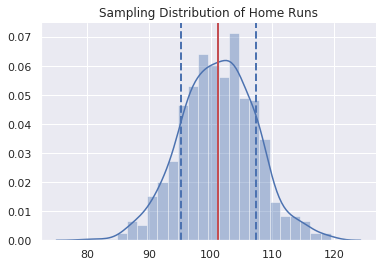

In [42]:
print(baseball['HR'].describe())
sample_means = []

for i in range(1000):
  mean = baseball['HR'].sample(n = 100).mean()
  sample_means.append(mean)

sample_means = pd.Series(sample_means)

sns.distplot(sample_means)
plt.title('Sampling Distribution of Home Runs')
plt.axvline(sample_means.mean(), linewidth = 2)
plt.axvline(baseball['HR'].mean(), color = 'r', linewidth = 2)
plt.axvline(sample_means.mean() + sample_means.std(), linestyle = 'dashed', linewidth = 2)
plt.axvline(sample_means.mean() - sample_means.std(), linestyle = 'dashed', linewidth = 2)
sns.despine();